## **K - Nearest Neighbors (KNN)**

KNN doesn't have a model. It stores all the examples in the training set.

For a given value of $k$ and selected distance metric, k-NN uses the following steps to assign label to the new example.

1. Find the distance between the new example to all other examples in the training set. 

2. Select the $k$ nearest examples and get their labels.


k-NN technique can be used for both **classification** and **regression** problems. 

* For classification task, **assign the label taken by majority of $k$ nearest neighbors**. 

* For regression task, **take the average of the output label and assign it to the new example**.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
import scipy.stats as st
from IPython.display import display, Math, Latex

####Distance Computation

In [49]:
def EuclideanDistance(x1, x2):
    '''
    Parameters 
    -----------
    x1 and x2 : two row vectors, i.e numpy arrays. 
        x1 can have multiple rows, in that case this function returns
        euclidean distance between every row in x1 from x2.

    Returns
    -------
    dist : a vector of euclidean distances between every row vector in x1
        from x2.
    '''
    dist = np.sum((x1-x2)**2, axis=1)
    return dist

def ManhattanDistance(x1, x2):
    '''
    Parameters 
    -----------
    x1 and x2 : two row vectors, i.e numpy arrays. 
        x1 can have multiple rows, in that case this function returns
        manhattan distance between every row in x1 from x2.

    Returns
    -------
    dist : a vector of manhattan distances between every row vector in x1
        from x2.
    '''
    return np.sum(np.abs(x1-x2), axis=1)

#### K-NN Implementation

In [50]:
class KNN:
    def __init__(self, k, distance_metric=EuclideanDistance, task_type='Classification'):
        '''
        Parameters 
        -----------
        newExample : example for which prediction has to be made 
        k : number of nearest neighbors used to make predictions.
        distance_metric : function used to calculatedistance metric.
        task_type : classification or regression 
        '''

        # Set k to desired value i.e. how many neighbours to check
        self._k = k
        self._distance_metric = distance_metric
        self._task_type = task_type

    def fit(self, X, y):
        '''
        Parameters 
        -----------
        X : A matrix of input examples.
        y : A column vector of corresponding labels.
        '''
        # fitting model on data only requires copying the data
        self._X = X
        self._y = y

    def predict(self, newExample):
        '''
        Parameters 
        -----------
        newExample : example for which prediction has to be made 
        k : number of nearest neighbors used to make predictions.
        distance_metric : function used to calculatedistance metric.
        task_type : classification or regression 
        
        Returns 
        -----------
        label : predicted label for newExample
        k_nearest_neighbors_indices : indices of the nearest k-neighbors

        '''

        # 2. Calculate the distance of newExample from the data
        # and store it in a distance vector

        distance_vector = self._distance_metric(self._X, newExample)

        # 3. get example of nearest k neighbours
        k_nearest_neighbours_indices = np.argpartition(distance_vector,
                                                       self._k)[:self._k]

        # 4. Get the labels of the selected k entries
        k_nearest_neighbours = self._y[k_nearest_neighbours_indices]

        # 5A. In case of a classification task, 
        # return the majority class by computing mode 
        # the k labels

        if(self._task_type=='Classification'):
            label = st.mode(k_nearest_neighbours)[0]

        # 5B. If the task is regression then return
        #  the average of labels of nearest neighbors.
        else:
            label = k_nearest_neighbours.mean()
        return label, k_nearest_neighbours_indices
    
    def eval(self, X_test, y_test):
        '''
        Returns Misclassification error for classification task
        and RMS error for regression
        '''
        if(self._task_type=='Classification'):
            y_pred = np.zeros(y_test.shape)
            for i in range(y_test.shape[0]):
                y_pred[i],_ = self.predict(X_test[i, :])
            error = np.mean(y_test==y_pred, axis=0)
        else:
            y_pred = np.zeros(y_test.shape)
            for i in range(y_test.shape[0]):
                y_pred[i],_ = self.predict(X_test[i, :])
            error_vector = y_pred - y_test
            error = np.sqrt((error_vector.T @error_vector)/error_vector.ravel().shape[0])
        return error


#### TASK 1 : **Classification**

**DEMO 1** : Simple Decision Boundary

* Let's generate 100 data-points, each represented with two features and a class label. This dataset is generated for **classification task** 

* The points are generated such that they are clustered in two groups with means $[0,0]$ and $[5,5]$ with standard deviation 1. 

In [51]:
X, y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=[[0, 0], [5, 5]],
                  cluster_std=1,
                  random_state=12)

Checking the shapes of feature matrix and label vector.

In [52]:
print('Shape of feature matrix : ', X.shape)
print('Shape of label vector : ', y.shape)

Shape of feature matrix :  (100, 2)
Shape of label vector :  (100,)


Plot the data

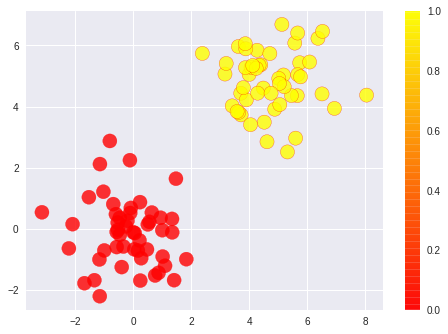

In [53]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            edgecolor='r', alpha=0.8, s=200, cmap='autumn')
plt.colorbar()
plt.grid(True)
plt.show()

Let's apply KNN technique and visualize how a new example is assigned to a label. For this example, the value of $k$ is set to be 3.

In [87]:
newExample = np.array([2.2, 2.7])

#initialize  a model with k=3 and euclidean distance 
# as distance metric
model = KNN(3, distance_metric=EuclideanDistance)
model.fit(X, y)

# get predictions for new data point
pred_label, k_nearest_neighbors_indices = model.predict(newExample.reshape(1, 2))

Visualize the new example 

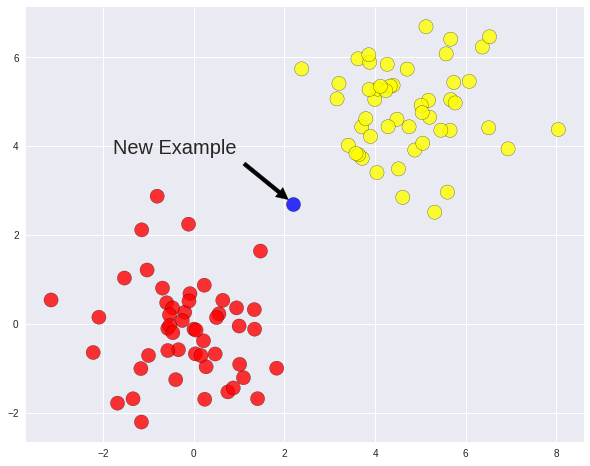

In [88]:
plt.figure(figsize=(10, 8))
plt.grid(True)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=200,
            edgecolor='black', alpha=0.8, cmap='autumn')

plt.scatter(newExample[0], newExample[1], marker='o',
            c='blue', edgecolor='black', alpha=0.8, s=200)

plt.annotate('New Example', xy=newExample, xytext=(-180, 50),
             textcoords='offset points',
             arrowprops=dict(facecolor='black', shrink=0.09,),
             fontsize=20)
plt.show()

Finding the nearest 3 neighbors.

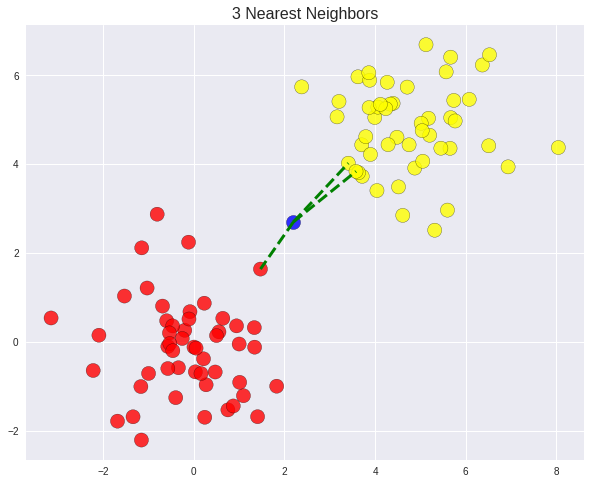

In [90]:
plt.figure(figsize=(10, 8))
plt.grid(True)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=200,
            edgecolor='black', alpha=0.8, cmap='autumn')

plt.scatter(newExample[0], newExample[1], marker='o',
            c='blue', edgecolor='black', alpha=0.8, s=200)

for xi in X[k_nearest_neighbors_indices]:
    plt.plot([newExample[0], xi[0]], [newExample[1], xi[1]],
             'g--', linewidth=3)
    
plt.title("3 Nearest Neighbors", fontsize=16)
plt.show()

Labelling the new point with majority class out of 3.

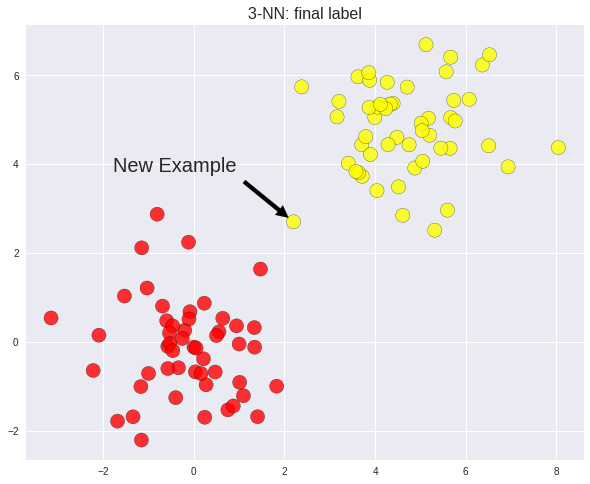

In [99]:
plt.figure(figsize=(10, 8))
plt.grid(True)

tx = np.concatenate((X, newExample.reshape(1, 2)), axis=0)
ty = np.concatenate((y, pred_label), axis=0)

plt.scatter(tx[:, 0], tx[:, 1], marker='o', c=ty, s=200,
            edgecolor='black', alpha=0.8, cmap='autumn')

plt.annotate('New Example', xy=newExample, xytext=(-180, 50),
             textcoords='offset points',
             arrowprops=dict(facecolor='black', shrink=0.09,),
             fontsize=20)

plt.title('3-NN: final label', fontsize=16)
plt.show()


Drawing decision boundary between the formed clusters

In [100]:
def draw_decision_boundary(model, axis_chart, num_points=201, opacity=0.05):
    tx = np.linspace(np.min(model._X[:, 0], axis=0)-2,
                    np.max(model._X[:, 0], axis=0)+2, num_points)
    ty = np.linspace(np.min(model._X[:, 0], axis=0)-2,
                    np.max(model._X[:, 0], axis=0)+2, num_points)

    xx, yy = np.meshgrid(tx, ty)
    grid_prediction = np.zeros(xx.shape)

    for i in range(num_points):
        for j in range(num_points):
            grid_prediction[i][j], _ = model.predict([xx[i][j], yy[i][j]])

    axis_chart.scatter(xx.ravel(), yy.ravel(),
                        c=grid_prediction.ravel(), alpha=opacity)

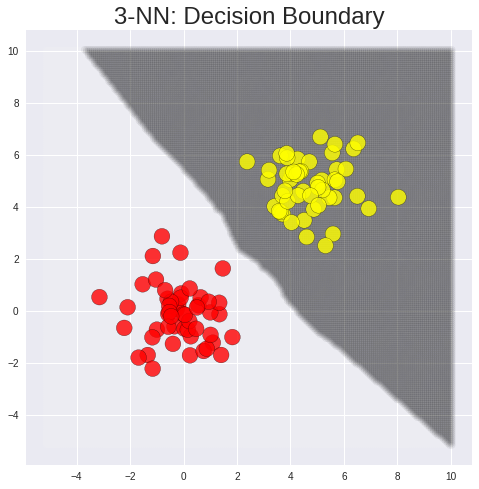

In [104]:
plt.figure(figsize=(8, 8))
current_axis = plt.gca()
plt.grid(True)

# model = KNN(3,distance_metric=EuclideanDistance)
draw_decision_boundary(model, current_axis)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=250, 
            edgecolor='k', alpha=0.8, cmap='autumn')

plt.title('3-NN: Decision Boundary', fontsize=24)
plt.show()

#### TASK 2 : **Regression**

In [105]:
# to make this notebook's output stable across runs 
np.random.seed(42) 

# Create a dataset of 100 examples with a single feature and a label.
# For this construction, we use the following three parameters:
w1 = 3 
w0 = 4 
n = 100 

X = 2*np.random.rand(n,)

# Obtain y = 4 + 3*x + noise. Noise is randomly sampled.
y = w0 + w1 *X + np.random.randn(n,) 

In [106]:
X = X.reshape(-1,1) 
y = y.reshape(-1,1)

print('Shape of the training data feature matrix :', X.shape)
print('Shape of label vector :', y.shape)


Shape of the training data feature matrix : (100, 1)
Shape of label vector : (100, 1)


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)

In [108]:
print('Shape of training feature matrix :', X_train.shape) 
print('Shape of training label vector :', y_train.shape) 
print('Shape of test feature matrix :',X_test.shape) 
print('Shape of test label matrix :',y_test.shape)

Shape of training feature matrix : (80, 1)
Shape of training label vector : (80, 1)
Shape of test feature matrix : (20, 1)
Shape of test label matrix : (20, 1)


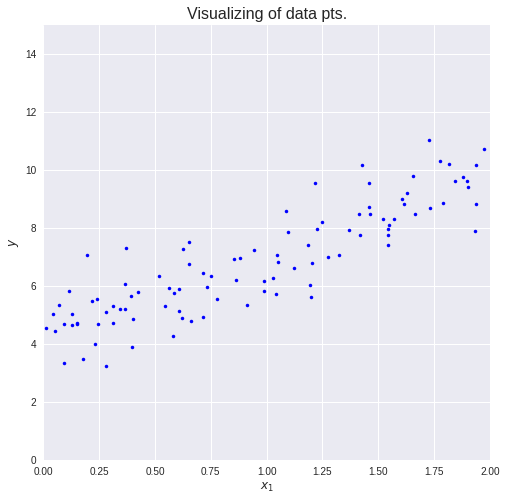

In [109]:
plt.figure(figsize=(8, 8))
plt.plot(X, y, 'b.')

plt.title('Visualizing of data pts.', fontsize=16)
plt.grid(True)

plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.axis([0, 2, 0, 15])
plt.show()

Visualizing test Predictions

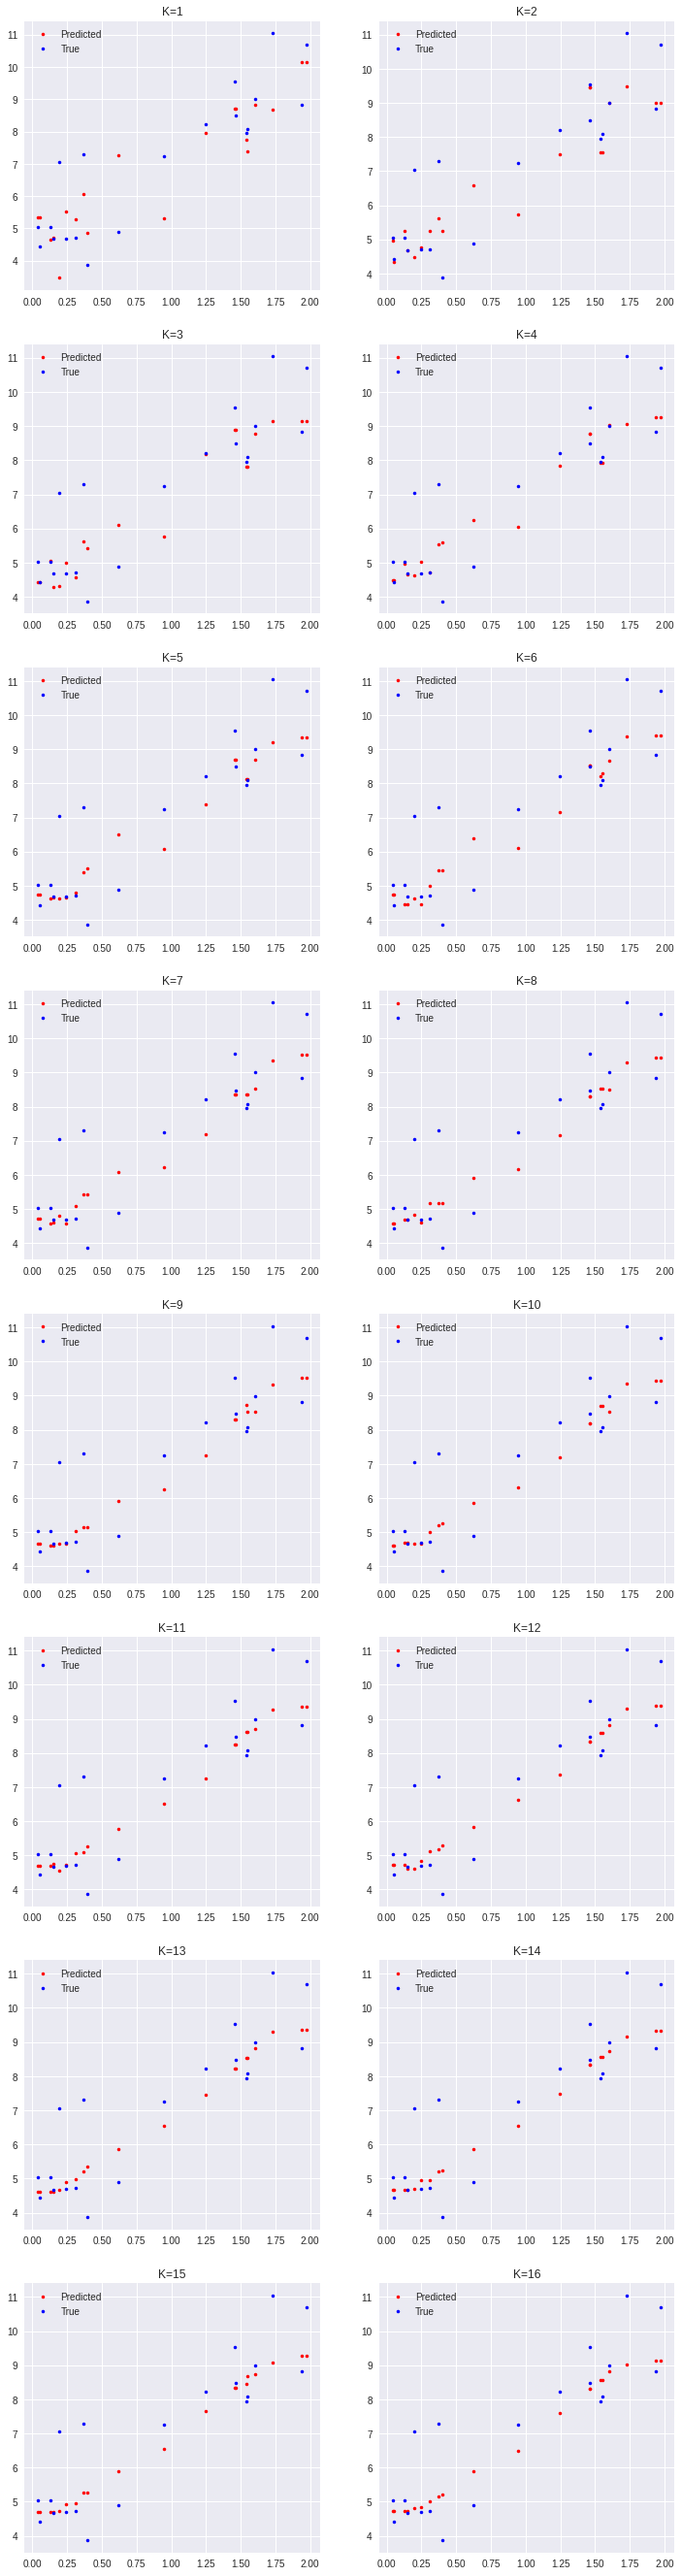

In [110]:
error_lst = []
plt.figure(figsize=(12, 48))
for i in range(16):
    # create model object with special value of K
    model = KNN(i+1, task_type='Regression')

    # fit the model
    model.fit(X_train, y_train)

    # create a vector to store the predictions
    y_test_predicted = np.zeros_like(y_test)

    # making predictions on test set
    for j in range(X_test.shape[0]):
        # predict on jth sample from test set
        y_test_predicted[j], _ = model.predict(X_test[j, :])

    error_lst.append(np.sum(np.power(y_test - y_test_predicted, 2)))

    # plotting predictions

    plt.subplot(8, 2, i+1)

    plt.plot(X_test, y_test_predicted, 'r.')
    plt.plot(X_test, y_test, 'b.')

    plt.legend(['Predicted', 'True'])

    plt.title(f'K={i+1}')

plt.show()

Plotting K v/s error

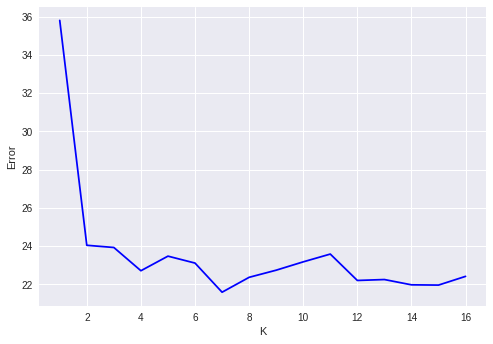

In [111]:
plt.plot(np.arange(len(error_lst))+1, error_lst, 'b-')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()